In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# read data (replace with your own path)
df = pd.read_csv('winequality-red.csv', sep=';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [2]:
def function(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
    # build and fit model
    reg = linear_model.LinearRegression()
    reg.fit(X_train,Y_train)

    # output model
    print("Coefficients:" ,reg.coef_)
    print("Intercept:", reg.intercept_)

    # compute predicted values
    Y_pred = reg.predict(X_test)

    # compute error statistics
    mse = mean_squared_error(Y_test, Y_pred)
    r2s = r2_score(Y_test, Y_pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    return reg.coef_

In [3]:
from sklearn.model_selection import train_test_split
# split into explanatory and response variables 
X = df.iloc[:,1:11]
Y = df.iloc[:,11]
coef1 = function(X,Y)

Coefficients: [-9.24415633e-01  8.08191446e-03 -5.39056032e-04 -2.41246461e+00
  4.17577793e-03 -2.69996488e-03 -2.11794263e+00 -4.47637954e-01
  8.34039739e-01  2.96611178e-01]
Intercept: 6.319466681403615
MSE =  0.39587672272177166
R2s =  0.37967574665322634


In [4]:
# standarise variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
X = dfn.iloc[:,1:11]
Y = dfn.iloc[:,11]
coef = function(X,Y)

Coefficients: [-0.24440565 -0.05756733 -0.00530545 -0.10046964  0.06461232 -0.1209179
  0.00177773 -0.11935322  0.17525277  0.41254797]
Intercept: -0.0006306076753229779
MSE =  0.5938577732384093
R2s =  0.36515703821482615


ValueError: not enough values to unpack (expected 2, got 1)

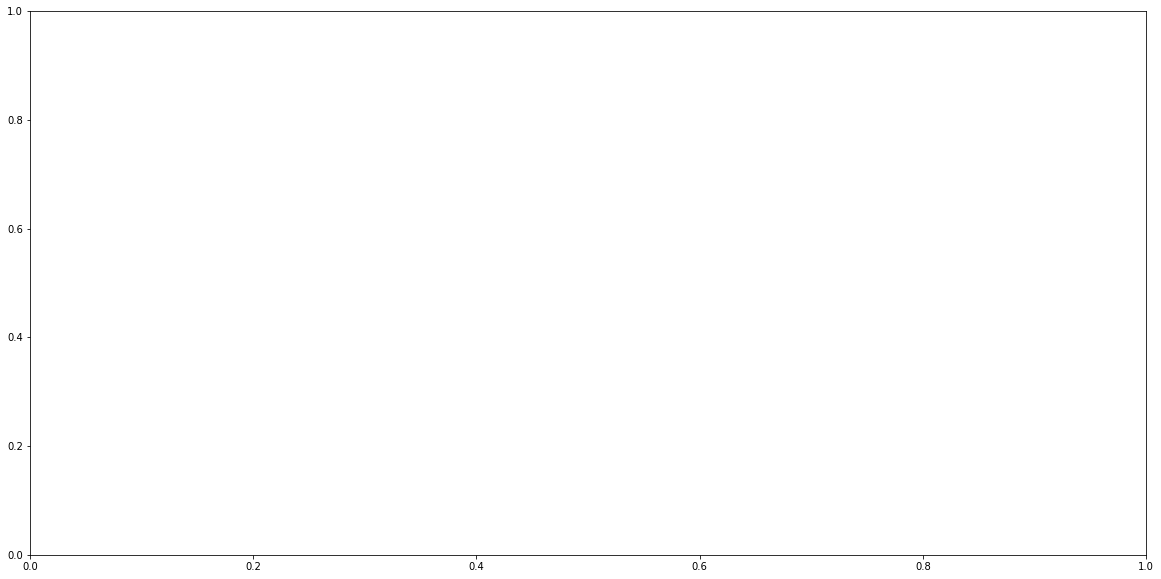

In [6]:
import matplotlib.pyplot as plt
# visualize with matplotlib
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(coef, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(names)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_yticklabels(cnames)
plt.savefig('heatmap_arvostukset_clusters_'+str(num_clusters)+'.png',bbox_inches='tight')
plt.show()

dfn = df.drop(["alcohol","quality"],axis = 1)
names = dfn.columns.get_values()
colors = ['r','b']

plt.figure(figsize=(20,10))
coef2 = pd.DataFrame(coef.reshape(1,10))
print(coef2.shape)
cax = plt.matshow(coef2, vmin=0, vmax=1)
plt.colorbar(cax)
ba = plt.bar(names, abs(coef))
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.3f' % float(height),
                ha='center', va='bottom')
autolabel(ba)
plt.colorbar()
plt.grid()